In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score, precision_recall_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel,SelectKBest,SelectPercentile
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 

In [2]:
#loading data file
#dataset source:https://www.kaggle.com/kennykozak/loan-repayment-prediction
fullFileName='C:/Users/SARA/Desktop/D I C/9351/travail pratique 1/dataset/loan_data_final.csv'
balance_data=pd.read_csv(fullFileName, sep=',', header=0)

In [3]:
print("Dataset Lenght:: ",len(balance_data))
#first we count the number of missing values in each row in pandas dataframe
balance_data.isnull().sum(axis=0)

Dataset Lenght::  9578


credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [4]:
print("Dataset shape:: ", balance_data.shape)

Dataset shape::  (9578, 14)


In [5]:
print("Dataset:: ")
balance_data.head()
balance_data.info()
balance_data.describe()

Dataset:: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
#handling categorical variables 
import pandas as pd
purpose_c = pd.get_dummies(balance_data['purpose'], drop_first=True)
loans = pd.concat([balance_data, purpose_c], axis=1).drop('purpose', axis=1)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,debt_consolidation,educational,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,0,0


In [32]:
#Creating the Source and Target Variables
X = loans.drop('credit.policy', axis = 1)
Y = loans['credit.policy']
#Spliting Dataset into Test and Train
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=1)
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [33]:
X_train.shape,X_test.shape

((7662, 15), (1916, 15))

In [34]:
#Decision Tree Classifier
#Function to perform training with Entropy
dt=DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [35]:
# Function to make prediction
y_pred_en=dt.predict(X_test)
#checking performance of the model
print(confusion_matrix(y_test, y_pred_en))
print(classification_report(y_test, y_pred_en))
f1_score(y_test, y_pred_en,average='weighted')

[[ 274   89]
 [   0 1553]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       363
           1       0.95      1.00      0.97      1553

    accuracy                           0.95      1916
   macro avg       0.97      0.88      0.92      1916
weighted avg       0.96      0.95      0.95      1916



0.9509510269741805

In [11]:
#Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100, max_features=.2)
rfc.fit(X_train, y_train)
predictionRF=rfc.predict(X_test)
#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))
f1_score(y_test, predictionRF,average='weighted')


[[ 351   12]
 [   5 1548]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       363
           1       0.99      1.00      0.99      1553

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.99      1916
weighted avg       0.99      0.99      0.99      1916



0.9910941333876212

In [12]:
#define K
import math
math.sqrt(len(y_test))

43.77213725647858

In [13]:
#K-NN classifier
knn=KNeighborsClassifier(n_neighbors=43, p=2, metric='euclidean')

#predict the test set results
knn.fit(X_train, y_train)
predictionKNN=knn.predict(X_test)
#Evaluate model
print(confusion_matrix(y_test, predictionKNN))
print(classification_report(y_test, predictionKNN))
f1_score(y_test, predictionKNN,average='weighted')

[[ 107  256]
 [   2 1551]]
              precision    recall  f1-score   support

           0       0.98      0.29      0.45       363
           1       0.86      1.00      0.92      1553

    accuracy                           0.87      1916
   macro avg       0.92      0.65      0.69      1916
weighted avg       0.88      0.87      0.83      1916



0.834202658762454

In [14]:
# svm Classifier
clf=svm.SVC(kernel="linear", C=1.0)
clf.fit(X_train,y_train)
predictionSVM=clf.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionSVM))
print(classification_report(y_test, predictionSVM))
f1_score(y_test, predictionSVM,average='weighted')

[[ 229  134]
 [  33 1520]]
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       363
           1       0.92      0.98      0.95      1553

    accuracy                           0.91      1916
   macro avg       0.90      0.80      0.84      1916
weighted avg       0.91      0.91      0.91      1916



0.907169162967491

In [15]:
#Bagging Classifier
bg=BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=10)
bg=BaggingClassifier()
bg.fit(X_train,y_train)
predictionbg=bg.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionbg))
print(classification_report(y_test, predictionbg))
f1_score(y_test, predictionbg,average='weighted')

[[ 353   10]
 [  86 1467]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       363
           1       0.99      0.94      0.97      1553

    accuracy                           0.95      1916
   macro avg       0.90      0.96      0.92      1916
weighted avg       0.96      0.95      0.95      1916



0.951641267240547

In [16]:
#Boosting Classifier- Ada Boost
adb=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
adb.fit(X_train,y_train)
predictionadb=adb.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionadb))
print(classification_report(y_test, predictionadb))
f1_score(y_test, predictionadb,average='weighted')

[[ 356    7]
 [  97 1456]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       363
           1       1.00      0.94      0.97      1553

    accuracy                           0.95      1916
   macro avg       0.89      0.96      0.92      1916
weighted avg       0.96      0.95      0.95      1916



0.9479037421606032

In [18]:
#Naive bayse Classifier
nb=GaussianNB()
nb.fit(X_train,y_train)
predictionnb=nb.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionnb))
print(classification_report(y_test, predictionnb))
f1_score(y_test, predictionnb,average='weighted')

[[ 227  136]
 [ 132 1421]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       363
           1       0.91      0.92      0.91      1553

    accuracy                           0.86      1916
   macro avg       0.77      0.77      0.77      1916
weighted avg       0.86      0.86      0.86      1916



0.8598277479099232

In [21]:
#creat Multilayer neural network Classifier
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train,y_train)
predictionNN=nn.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionNN))
print(classification_report(y_test, predictionNN))
f1_score(y_test, predictionNN,average='weighted')


[[ 272   91]
 [  29 1524]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       363
           1       0.94      0.98      0.96      1553

    accuracy                           0.94      1916
   macro avg       0.92      0.87      0.89      1916
weighted avg       0.94      0.94      0.94      1916



0.9350583678422171

In [22]:
#Voting Classifier- Multiple Model Ensemble
evc=VotingClassifier(estimators=[('dt',dt),('rfc',rfc),('clf',clf),('knn',knn),('bg',bg),('adb',adb),('nb',nb),('nn',nn)], voting='hard')
evc.fit(X_train,y_train)
predictionevc=evc.predict(X_test)

#Evaluate model
print(confusion_matrix(y_test, predictionevc))
print(classification_report(y_test, predictionevc))
f1_score(y_test, predictionevc,average='weighted')

[[ 344   19]
 [   4 1549]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       363
           1       0.99      1.00      0.99      1553

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



0.9878980452572027

In [23]:
#defining learning classifiers
names=["Decision_Tree", "Random_Forest", "linear_SVM","Nearest_Neighbors","Bagging","AdaBoost","Naive_Bayes","Neural_Net","Vothing_classifier"]
classifiers = [dt,rfc,clf,knn,bg,adb,nb,nn,evc]

In [24]:
#Build Model, Apply Model on Test Data & Record Accuracy Scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    prediction=clf.predict(X_test)
    score=f1_score(y_test, prediction,average='weighted')
    scores.append(score)

In [25]:
scores

[0.9509510269741805,
 0.9900463843744001,
 0.907169162967491,
 0.834202658762454,
 0.9493469602475108,
 0.947423296505567,
 0.8598277479099232,
 0.9350583678422171,
 0.9873648624759218]

In [26]:
#create data frame of model performance
df = pd.DataFrame()
df['Machine Learning algorithms'] = names
df['F-measure of Loan Repayment'] = scores 


In [27]:
#adding colors to the data frame
cm = sns.light_palette("#FF7F50", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Machine Learning algorithms,F-measure of Loan Repayment
0,Decision_Tree,0.950951
1,Random_Forest,0.990046
2,linear_SVM,0.907169
3,Nearest_Neighbors,0.834203
4,Bagging,0.949347
5,AdaBoost,0.947423
6,Naive_Bayes,0.859828
7,Neural_Net,0.935058
8,Vothing_classifier,0.987365


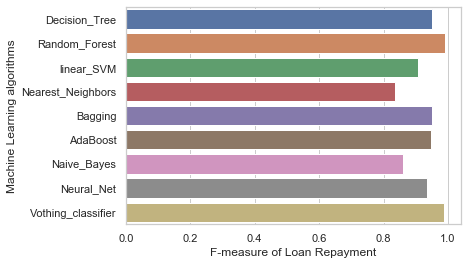

In [29]:
#Bar plot of model performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Machine Learning algorithms", x="F-measure of Loan Repayment", data=df)
